In [1]:
import pandas
import json
from pandas.io.json import json_normalize
%matplotlib inline

In [2]:
def load_fs(fname):
    data = json.load(open(fname, 'r'))['response']['group']['results'][1:]
    df = json_normalize(data)
    df.set_index('id', inplace=True)
    return df
fs1 = load_fs('voronezh/fs1.json')
fs2 = load_fs('voronezh/fs2.json')
fs3 = load_fs('voronezh/fs3.json')

fs = fs1.append(fs2).append(fs3)
fs.head()

,displayType,photo.createdAt,photo.height,photo.id,photo.prefix,photo.suffix,photo.user.canonicalPath,photo.user.canonicalUrl,photo.user.firstName,photo.user.gender,...,venue.ratingColor,venue.ratingSignals,venue.restricted,venue.stats.checkinsCount,venue.stats.tipCount,venue.stats.usersCount,venue.storeId,venue.urlSig,venue.venuePage.id,venue.verified
id,,,,,,,,,,,,,,,,,,,,,
5a8146980a464d412808b7c1,venue,1459087031,1920,56f7e6b7498e3de5bbd5ba5e,https://igx.4sqi.net/img/general/,/64702450_BNh_0fx_DaTgyKE4w61bNi5cU5fG8pxpoTdJ...,/user/64702450,https://foursquare.com/user/64702450,Olesya💕,female,...,73CF42,75.0,True,1251,16,399,NaN,pkNCUVX3kQjLIGnxk7IMCf3spaY=,NaN,False
5a8146980a464d412808b7c2,venue,1386316529,960,52a182f1498e0d0c60138163,https://igx.4sqi.net/img/general/,/36109074_rD5KOMmZQ-1_WJCYBI-FOcK--HgdzA7gGvML...,/bw_wooster,https://foursquare.com/bw_wooster,Sergey,male,...,73CF42,23.0,True,1122,7,61,NaN,J52SxC86dIbjPtAxxkq/64MSE1c=,NaN,False
5a8146980a464d412808b7c3,venue,1470419609,1440,57a4d299cd10893e79334128,https://igx.4sqi.net/img/general/,/150201190_mnVCCCvkxPRws8RCiSmuclF-h69YpTKT5bC...,/strawbeeerryyy,https://foursquare.com/strawbeeerryyy,Strawberry🍓,female,...,C5DE35,78.0,True,628,21,293,NaN,hwvpbBpRnpkRGZVsFW3OUF9P4LA=,NaN,False
5a8146980a464d412808b7c4,venue,1364891633,959,515a97f1e4b0bfa88e2e9328,https://igx.4sqi.net/img/general/,/12178328_82yTsUckqk6Bc8WnNqgtMUNnUTF6eFQkNlCh...,/v_brovkin,https://foursquare.com/v_brovkin,Victor,male,...,C5DE35,59.0,True,348,18,205,NaN,Q/3T5z+FW+lSttrXksth7xNjVqI=,NaN,False
5a8146980a464d412808b7c5,venue,1515498996,1440,5a54adf469e77b6395f43320,https://igx.4sqi.net/img/general/,/463589457_IX5ArhWYgzbO7tZF6A7Yli01qxaecG5GB8x...,/user/463589457,https://foursquare.com/user/463589457,Saed,male,...,C5DE35,23.0,True,665,5,181,NaN,NaN,NaN,False


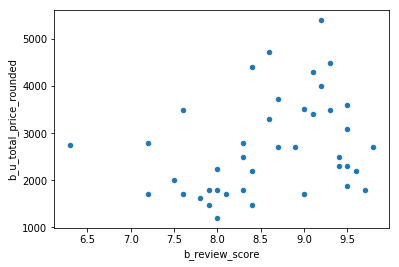

In [3]:
booking_raw = json.load(open('voronezh/booking.json', 'r'))
booking_hotels = booking_raw['b_hotels']
booking = pandas.DataFrame(booking_hotels)

# booking['b_review_word'] = pandas.Categorical(booking['b_review_word'], ordered=True).set_categories(['Pleasant', 'Good', 'Very good', 'Superb', 'Exceptional', 'Fabulous'], ordered=True)
# booking['b_review_word']
# booking[['b_review_word','b_u_total_price_rounded']].boxplot(by='b_review_word')
booking['b_review_score'] = pandas.to_numeric(booking['b_review_score'])
booking.plot.scatter(x='b_review_score', y='b_u_total_price_rounded')

In [4]:
attractions = pandas.read_excel('voronezh/attractions.xlsx', header=1)
del attractions['Unnamed: 6']
del attractions['№ п/п']
del attractions['Документ о принятии на гос. охрану']

d_prec = attractions['Датировка'].str.match(r'^\d\d\d\d г\.$') | False
d_prec_range = attractions['Датировка'].str.match(r'^\d\d\d\d-\d\d\d\d гг\.$') | False
d_prec_cent = attractions['Датировка'].str.match(r'^[кн]. \w{1,5} в\.$') | False
attractions[~d_prec & ~d_prec_range & ~d_prec_cent]

,Наименование памятника,Датировка,Категория охраны,Адрес
1,"Усадьба, где жил статистик И.К. Воронов:\nа) ф...",\nк. XIX в.\nк. XIX в.,Р,"\nул. Авиационная, 37\nул. Авиационная, 39"
5,Усадьба ветеринара А.И. Веревкина:\nа) дом жил...,\nк. XVIII в.\nк. XIX в.,Р,"\nул. Батуринская, 18\nул. Батуринская, 20"
7,Дом архитектора А.М. Баранова,NaN,Р,"ул. Батуринская, 34"
13,Ансамбль Покровской церкви:\nа) Покровская цер...,\n1736-1841 гг.\nн. XIX в.,\nФ,"\nул. Бехтерева, 38\n\nул. Бехтерева, 36"
16,"Главный дом – Дом ""Делегатского собрания"" / До...",сер. XVIII в.,Ф,"ул. Вайцеховского, 2/4"
18,Производственный комплекс,18-19 вв.,Р,территория в квартале ул. Вайцеховского – Каля...
24,Дом винозаводчика Н.С. Арно,Вт. пол. XIX в.,Р,"ул. Герцена, 16"
27,Дом братьев Гревцовых с барельефами\n,Сер. XIX в.,Р,"ул. 20-летия ВЛКСМ (Поднабережная), 35"
33,Дом Дольских\n,к. XIX - н. ХХ в,Р,"ул. 25 Октября, 21 (Большая Богоявленская)"
34,ВИСИ,1930-е годы,Р,"ул. 20 лет Октября, 84 (Большая Чижовская)"
